In [1]:
import sys
sys.path.append('../')

import os

import numpy as np
import pandas as pd


import matplotlib.pyplot as plt
import plotly.express as px
import plotly.io as pio
import matplotlib.ticker as mtick
from matplotlib.ticker import FuncFormatter
import seaborn as sns

pio.renderers.default = "png" # For GitHub rendering

# Issuance Sweep Run Experiment

*Danilo Lessa Bernardineli, Shawn Anderson November 2023*

In this notebook, we run an issuance sweep run that compares two parameter sets. 


## Part 1. Running the Simulation

In [2]:
from subspace_model.experiments.experiment import issuance_sweep

sim_df = issuance_sweep()
## Load simulation results from terminal ran experiment
# sim_df = pd.read_pickle("../data/simulations/issuance_sweep-2023-12-11_17-49-41.pkl.gz")


2023-12-12 10:20:53 - subspace-digital-twin - INFO
------------subspace-digital-twin------------



                  ___________    ____
  ________ __ ___/ / ____/   |  / __ \
 / ___/ __` / __  / /   / /| | / / / /
/ /__/ /_/ / /_/ / /___/ ___ |/ /_/ /
\___/\__,_/\__,_/\____/_/  |_/_____/
by cadCAD

cadCAD Version: 0.4.28
Execution Mode: local_proc
Simulation Dimensions:
Entire Simulation: (Models, Unique Timesteps, Params, Total Runs, Sub-States) = (1, 701, 39, 6, 36)
     Simulation 0: (Timesteps, Params, Runs, Sub-States) = (701, 39, 6, 36)


Initializing configurations:   0%|          | 0/6 [00:00<?, ?it/s]

Execution Method: local_simulations
Execution Mode: parallelized


Flattening results:   0%|          | 0/6 [00:00<?, ?it/s]

Total execution time: 6.25s


In [3]:
sim_df = sim_df.set_index(['label', 'run', 'days_passed'])

In [4]:
sim_df.head()

delta_days  delta_blocks  \
label                     run days_passed                             
default-issuance-function 1   0                   NaN           NaN   
                              1                   1.0       14400.0   
                              2                   1.0       14400.0   
                              3                   1.0       14400.0   
                              4                   1.0       14400.0   

                                           circulating_supply   user_supply  \
label                     run days_passed                                     
default-issuance-function 1   0                           NaN           NaN   
                              1                  1.440037e+06  1.440037e+06   
                              2                  2.880064e+06  2.880064e+06   
                              3                  4.320078e+06  4.320092e+06   
                              4                  5.760069e+06  5.760140e+06   

                                           issued_supply  sum_of_stocks  \
label                     run days_passed                                 
default-issuance-function 1   0                      NaN            NaN   
                              1             1.440037e+06   3.000000e+09   
                              2             2.880065e+06   3.000000e+09   
                              3             4.320095e+06   3.000000e+09   
                              4             5.760145e+06   3.000000e+09   

                                           block_utilization  \
label                     run days_passed                      
default-issuance-function 1   0                          NaN   
                              1                     0.000010   
                              2                     0.000008   
                              3                     0.000009   
                              4                     0.000015   

                                           dsf_relative_disbursal_per_day  \
label                     run days_passed                                   
default-issuance-function 1   0                                       0.0   
                              1                                       0.0   
                              2                                       0.0   
                              3                                       0.0   
                              4                                       0.0   

                                           reward_issuance_balance  \
label                     run days_passed                            
default-issuance-function 1   0                       1.320000e+09   
                              1                       1.318560e+09   
                              2                       1.317120e+09   
                              3                       1.315680e+09   
                              4                       1.314240e+09   

                                           other_issuance_balance  ...  \
label                     run days_passed                          ...   
default-issuance-function 1   0                      1.680000e+09  ...   
                              1                      1.680000e+09  ...   
                              2                      1.680000e+09  ...   
                              3                      1.680000e+09  ...   
                              4                      1.680000e+09  ...   

                                            base_fee_function  \
label                     run days_passed                       
default-issuance-function 1   0            function: <lambda>   
                              1            function: <lambda>   
                              2            function: <lambda>   
                              3            function: <lambda>   
                              4            function: <lambda>   

          

In [5]:
sim_df['block_reward'].groupby('label').describe()

,count,mean,std,min,25%,50%,75%,max
label,,,,,,,,
default-issuance-function,1402.0,1.440034e+06,1.288588e+01,1.440012e+06,1.440025e+06,1.440033e+06,1.440043e+06,1.440070e+06
mock-issuance-function,1402.0,1.881383e+06,2.992856e+06,1.162011e+04,6.746074e+04,3.916445e+05,2.273699e+06,1.320000e+07
mock-issuance-function-2,1402.0,1.883024e+06,4.983792e+07,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.320000e+09


In [6]:
sim_df['block_utilization'].groupby('label').describe()

,count,mean,std,min,25%,50%,75%,max
label,,,,,,,,
default-issuance-function,1402.0,0.000011,0.000004,0.000004,0.000008,0.000011,0.000014,0.000022
mock-issuance-function,1402.0,0.000011,0.000004,0.000004,0.000008,0.000011,0.000014,0.000022
mock-issuance-function-2,1402.0,0.000011,0.000004,0.000004,0.000008,0.000011,0.000014,0.000022


[Text(0.5, 1.0, 'AB Test Circulating Supply')]

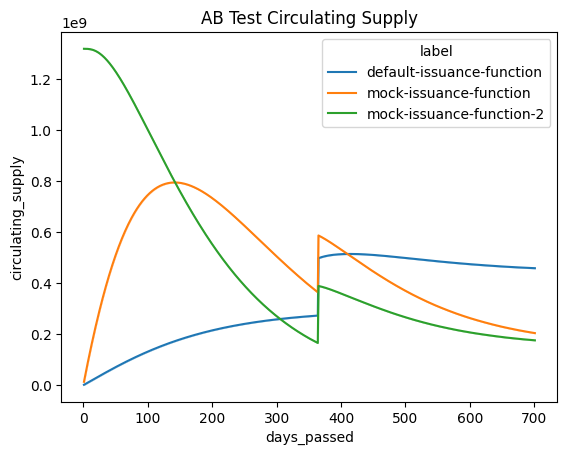

In [7]:
sns.lineplot(sim_df, x="days_passed", y="circulating_supply", hue="label").set(
    title="AB Test Circulating Supply"
)

[Text(0.5, 1.0, 'AB Test Operator Pool Shares')]

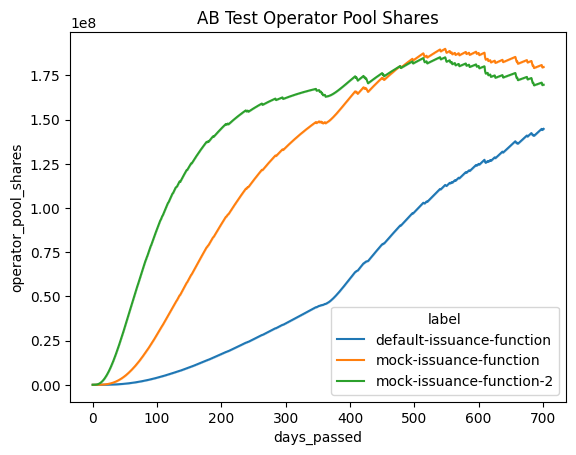

In [8]:
sns.lineplot(sim_df, x="days_passed", y="operator_pool_shares", hue="label").set(
    title="AB Test Operator Pool Shares"
)

[Text(0.5, 1.0, 'AB Test Nominator Pool Shares')]

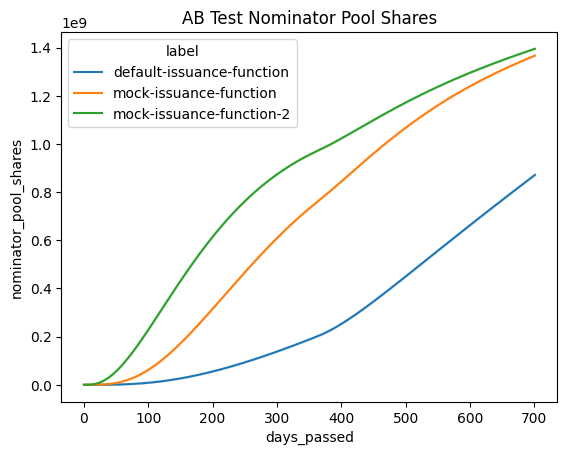

In [9]:
sns.lineplot(sim_df, x="days_passed", y="nominator_pool_shares", hue="label").set(
    title="AB Test Nominator Pool Shares"
)

[Text(0.5, 1.0, 'AB Test Block Utilization')]

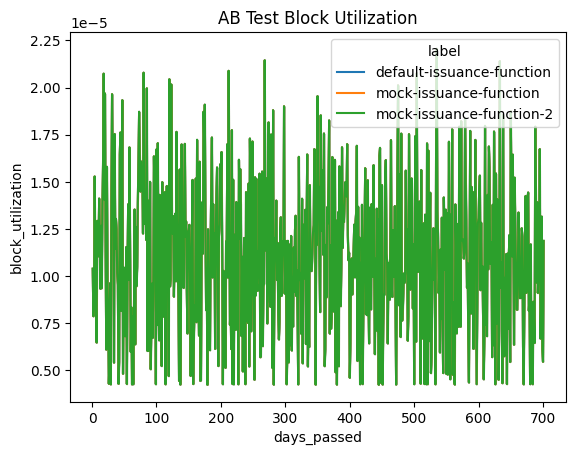

In [10]:
sns.lineplot(sim_df, x="days_passed", y="block_utilization", hue="label").set(
    title="AB Test Block Utilization"
)

[Text(0.5, 1.0, 'AB Test Windowed Volatility of Circulating Supply')]

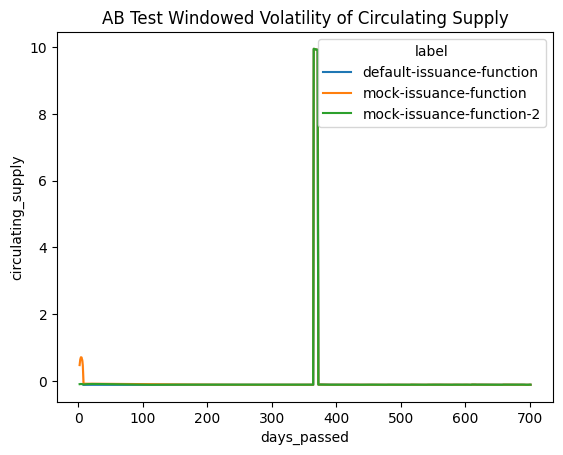

In [11]:
from subspace_model.trajectory_metrics import *


lst = []
for i, g_df in sim_df.groupby("run"):
    s = window_volatility(g_df.circulating_supply.diff()).reset_index()
    lst.append(s)

df = pd.concat(lst).dropna()
sns.lineplot(df, x="days_passed", y="circulating_supply", hue="label").set(
    title="AB Test Windowed Volatility of Circulating Supply"
)